# Wordcloud Demo

## Intended to scrape through a number of news RSS Feeds and generate wordclouds from the results

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from newspaper import Article
import nltk
import pandas as pd
from PIL import Image
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mathew/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Setup your RSS Feeds

In [6]:
feeds = ['https://globalnews.ca/feed/',
        'https://news.un.org/feed/subscribe/en/news/all/rss.xml',
        'https://www.globalissues.org/news/feed',
        'https://feeds.a.dj.com/rss/RSSWorldNews.xml',
        'https://www.worldpress.org/feeds/topstories.xml',
        'http://feeds.bbci.co.uk/news/world/rss.xml',
        'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml',
        'https://www.buzzfeed.com/world.xml',
        'https://www.aljazeera.com/xml/rss/all.xml',
        'https://defence-blog.com/feed/',
        'https://www.rt.com/rss/news/',
        'http://rss.cnn.com/rss/edition_world.rss']

### Pull URLs in from your RSS Feeds

In [7]:
articles = []

for feed in feeds:
    response = requests.get(feed)
    webpage = response.content
    soup = BeautifulSoup(webpage, features='xml')
    
    items = soup.find_all('item')
    
    for item in items:
        link = item.find('link').text
        articles.append(link)

In [8]:
articles

['https://globalnews.ca/news/8665324/mental-health-monday-talk-today-chl-hockey/',
 'https://globalnews.ca/news/8664948/calgary-knickers-and-lace-break-and-enter/',
 'https://globalnews.ca/news/8665365/canada-drone-cameras-ukraine-russia-war/',
 'https://globalnews.ca/news/8665539/ukraine-russia-evacuations-invasion-march-7/',
 'https://globalnews.ca/news/8665206/inmates-sentenced-joyceville-institution-attack/',
 'https://globalnews.ca/news/8665333/okotoks-hemophilia-fundraiser/',
 'https://globalnews.ca/news/8665543/central-okanagan-buyers-priced-out-real-estate/',
 'https://globalnews.ca/news/8665284/man-arrested-firearms-seized-kelowna-carjacking/',
 'https://globalnews.ca/news/8665454/arson-delta-bc-playground/',
 'https://globalnews.ca/news/8665504/edmonton-oilers-calgary-flames-ukraine-russia-alex-ovechkin/',
 'https://news.un.org/feed/view/en/story/2022/03/1113492',
 'https://news.un.org/feed/view/en/story/2022/03/1113462',
 'https://news.un.org/feed/view/en/story/2022/03/11134

### Download and Parse through your URLs

In [9]:
data = []

for url in articles:
    info = Article(url)
    try:
        info.download()
        info.parse()
        info.nlp()
        keywords = info.keywords
        texts = info.text
        saved = [url, keywords, texts]
        data.append(saved)
    except:
        ## Packing this all in to a try statement to handle bad urls that are sometimes included 
        continue

In [10]:
data

[['https://globalnews.ca/news/8665324/mental-health-monday-talk-today-chl-hockey/',
  ['chl',
   'health',
   'hrudey',
   'okanagan',
   'hockey',
   'today',
   'sure',
   'program',
   'help',
   'players',
   'really',
   'league',
   'talk',
   'playing',
   'mental'],
  'Send this page to someone via email\n\nIn the Canadian Hockey League, the worlds’ top junior hockey league, the stakes are high and so is the pressure.\n\nBut when it comes to the world of hockey, mental health can still be something that’s not openly talked about.\n\nHowever, the CHL and the Canadian Mental Health Association are trying to change that with a program called ‘Talk Today’\n\n“It’s really all about making sure that people are comfortable coming forward to talk about the challenges they may be having in mental health,” said WHL commissioner Ron Robison.\n\n“Whether it’s combining being a student athlete, combining school with playing hockey, the competitive schedule, their performance on the ice, the

### Put your list of lists into a dataframe

In [11]:
label = ['URL', 'Keywords','Text']
df = pd.DataFrame(data)
df.columns = label

In [48]:
df.shape
# Looking to see how many articles to parse through

(228, 3)

### Stop words

In [13]:
## Though there is a set of default stop words (stuff to not be included), sometimes you want to add
stopwords = set(STOPWORDS)
stopwords.update(['rt','guardian','abc','nbc','cbs','nytimes','globalnews','state'])
print(stopwords)

{'until', 'own', 'to', "she'll", "i'm", 'an', "you'd", 'globalnews', "doesn't", 'also', 'being', 'themselves', "don't", 'did', 'www', 'his', 'ourselves', "i'd", "he'll", "we'll", 'after', "i'll", 'each', 'only', 'having', 'i', "shan't", 'theirs', 'their', 'would', 'into', 'myself', 'such', "you'll", 'should', 'get', 'shall', "why's", 'further', 'but', 'otherwise', 'yours', 'yourself', 'through', 'over', 'my', 'as', 'whom', "she'd", 'before', 'hence', 'up', 'was', 'rt', 'its', 'am', 'been', "didn't", 'who', 'so', 'nytimes', "you're", "can't", 'have', 'however', 'other', 'against', 'that', "wouldn't", "she's", 'all', 'has', 'me', "we're", 'is', "isn't", 'when', 'for', "we'd", 'r', 'can', 'those', 'we', 'else', 'same', 'down', 'her', 'like', 'most', 'no', 'hers', 'herself', 'your', 'below', "it's", 'from', 'than', "what's", 'ours', 'these', 'k', "when's", "mustn't", "they'd", "he's", 'more', 'which', 'here', 'ever', 'there', 'because', 'could', "there's", 'few', 'this', "won't", "let's", 

#### Single Article Example

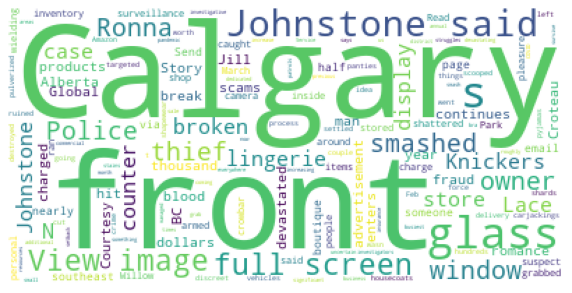

In [14]:
text = df.Text[1]

wordcloud = WordCloud(stopwords=stopwords,max_words=200,background_color='white').generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show;

#### All Keywords from all articles

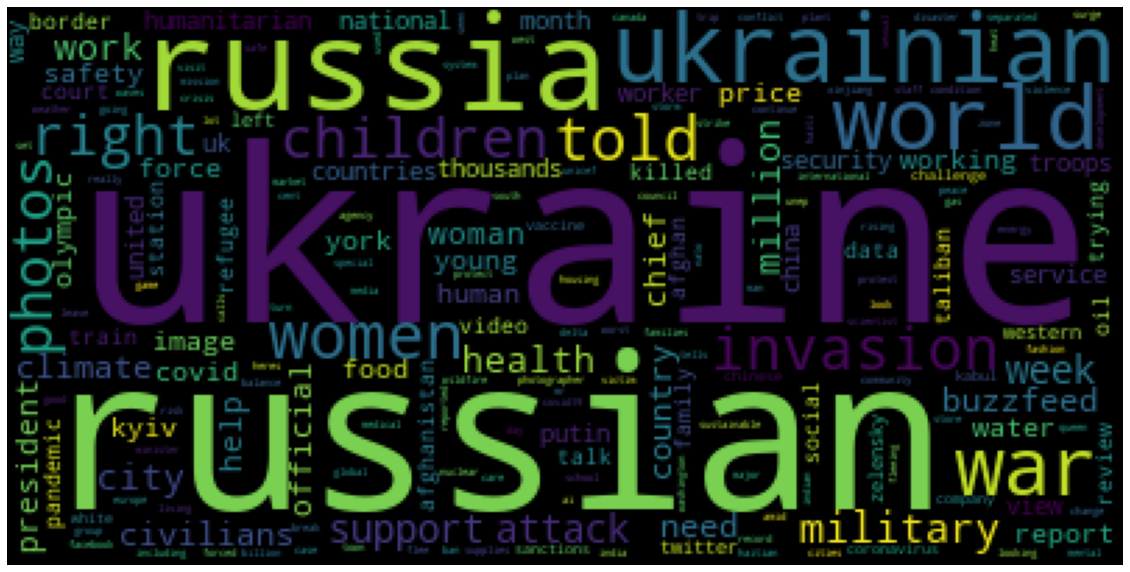

In [15]:
keywords = [j for i in df.Keywords for j in i]

text = ' '.join(i for i in keywords)
new_wordcloud = WordCloud(stopwords=stopwords,collocations=False).generate(text)

plt.figure(figsize=[20,20])
plt.imshow(new_wordcloud)
plt.axis('off')
plt.show;

#### Playing with image masking

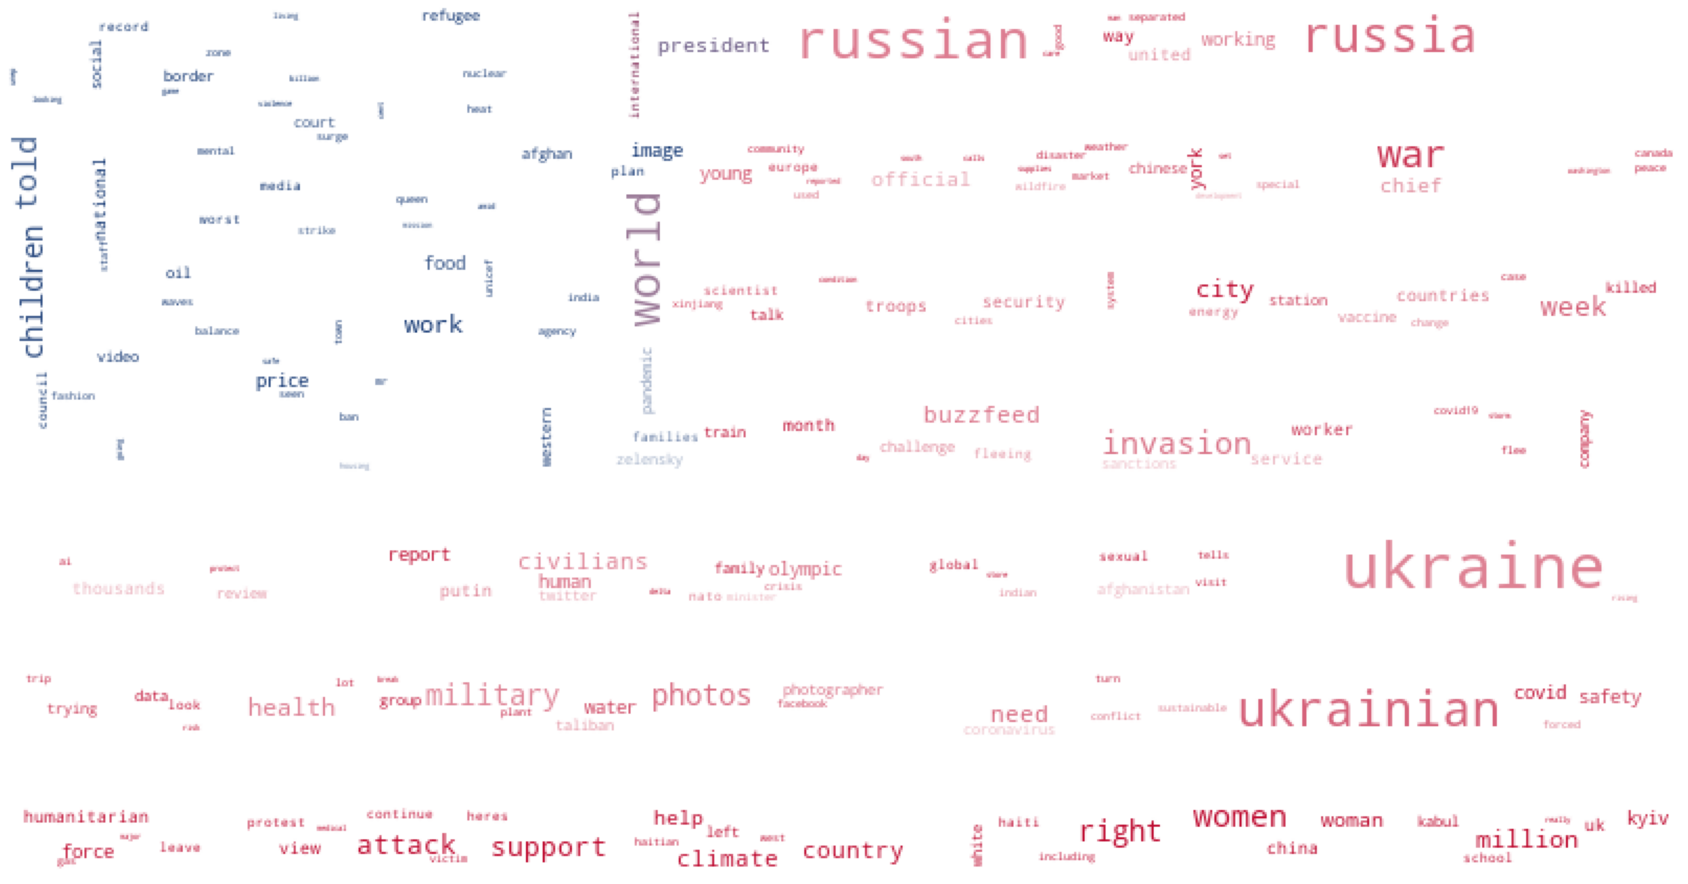

In [16]:
frame = np.array(Image.open('Flag.jpg'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)
plt.figure(figsize=[30,30])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

#### Other Examples of Word Masks

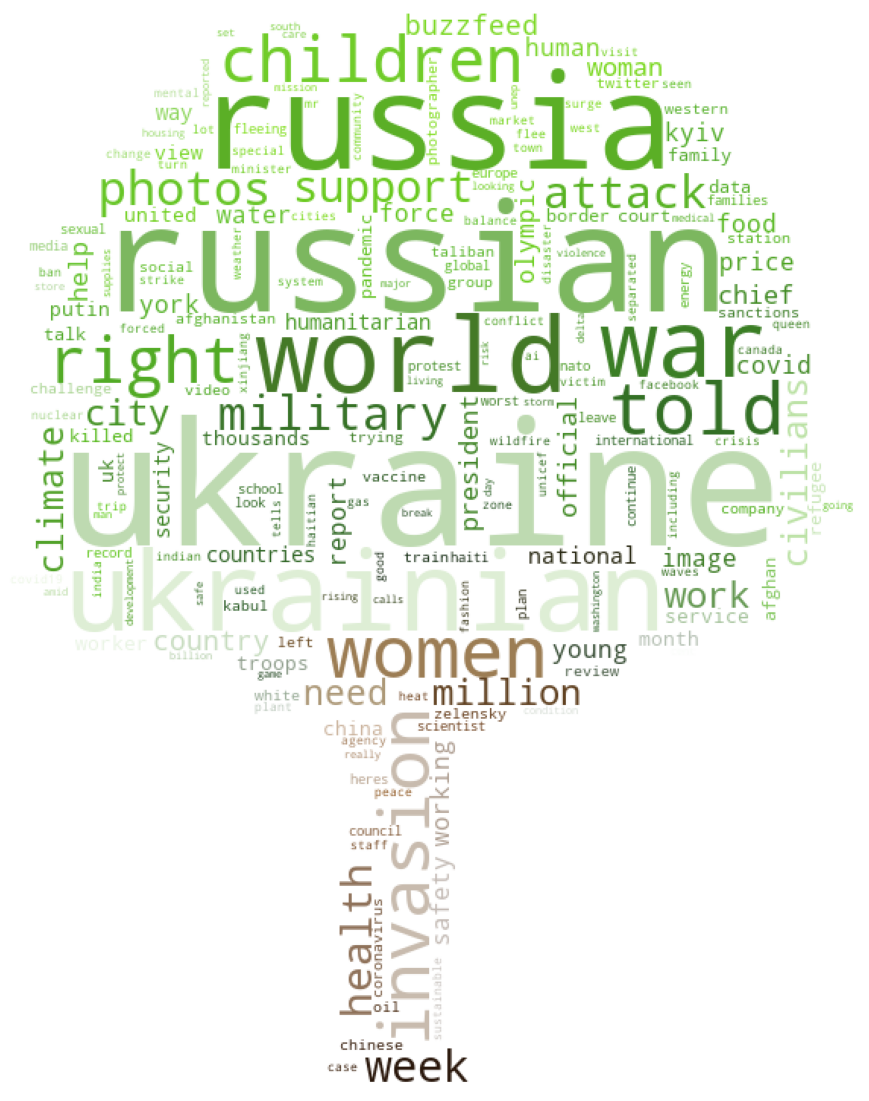

In [17]:
frame = np.array(Image.open('Tree.jpg'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[20,20])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

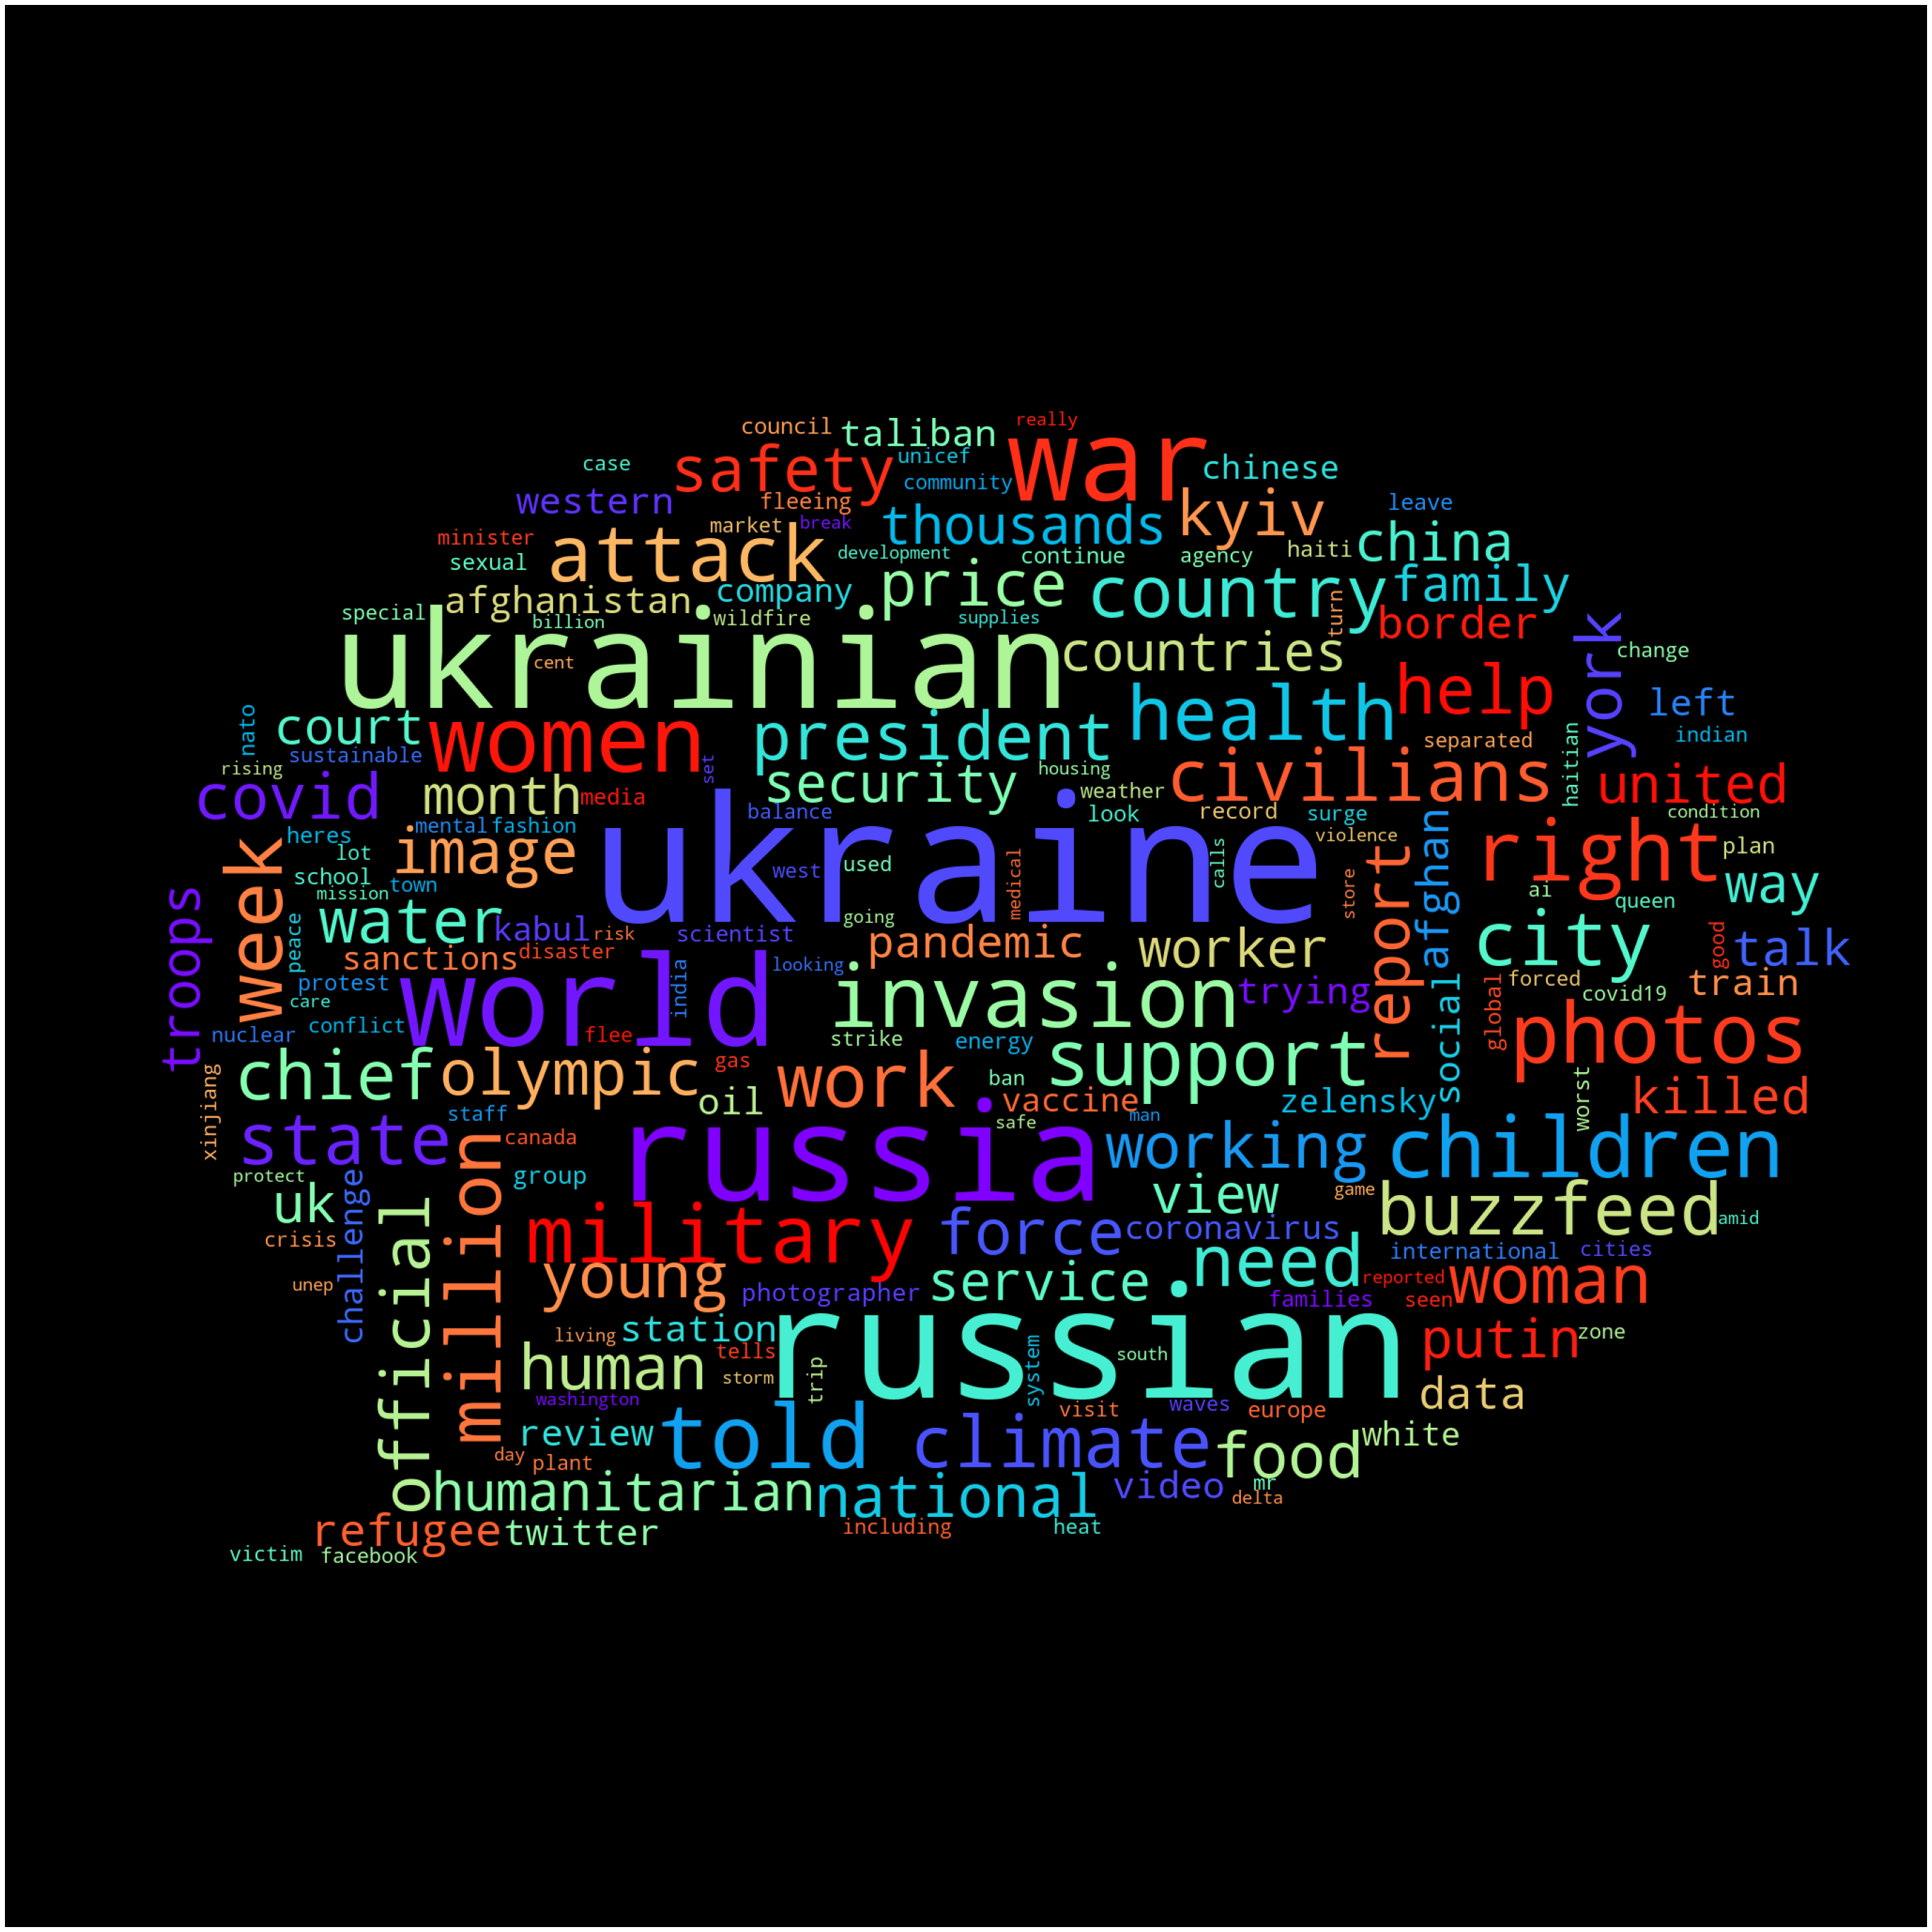

In [46]:
frame = np.array(Image.open('comment.png'))
wordcloud = WordCloud(random_state=1, colormap='rainbow', collocations=False, stopwords = STOPWORDS, mask=frame).generate(text)

plt.figure(figsize=[50,50])
plt.imshow(wordcloud)
plt.axis('off')
plt.show;

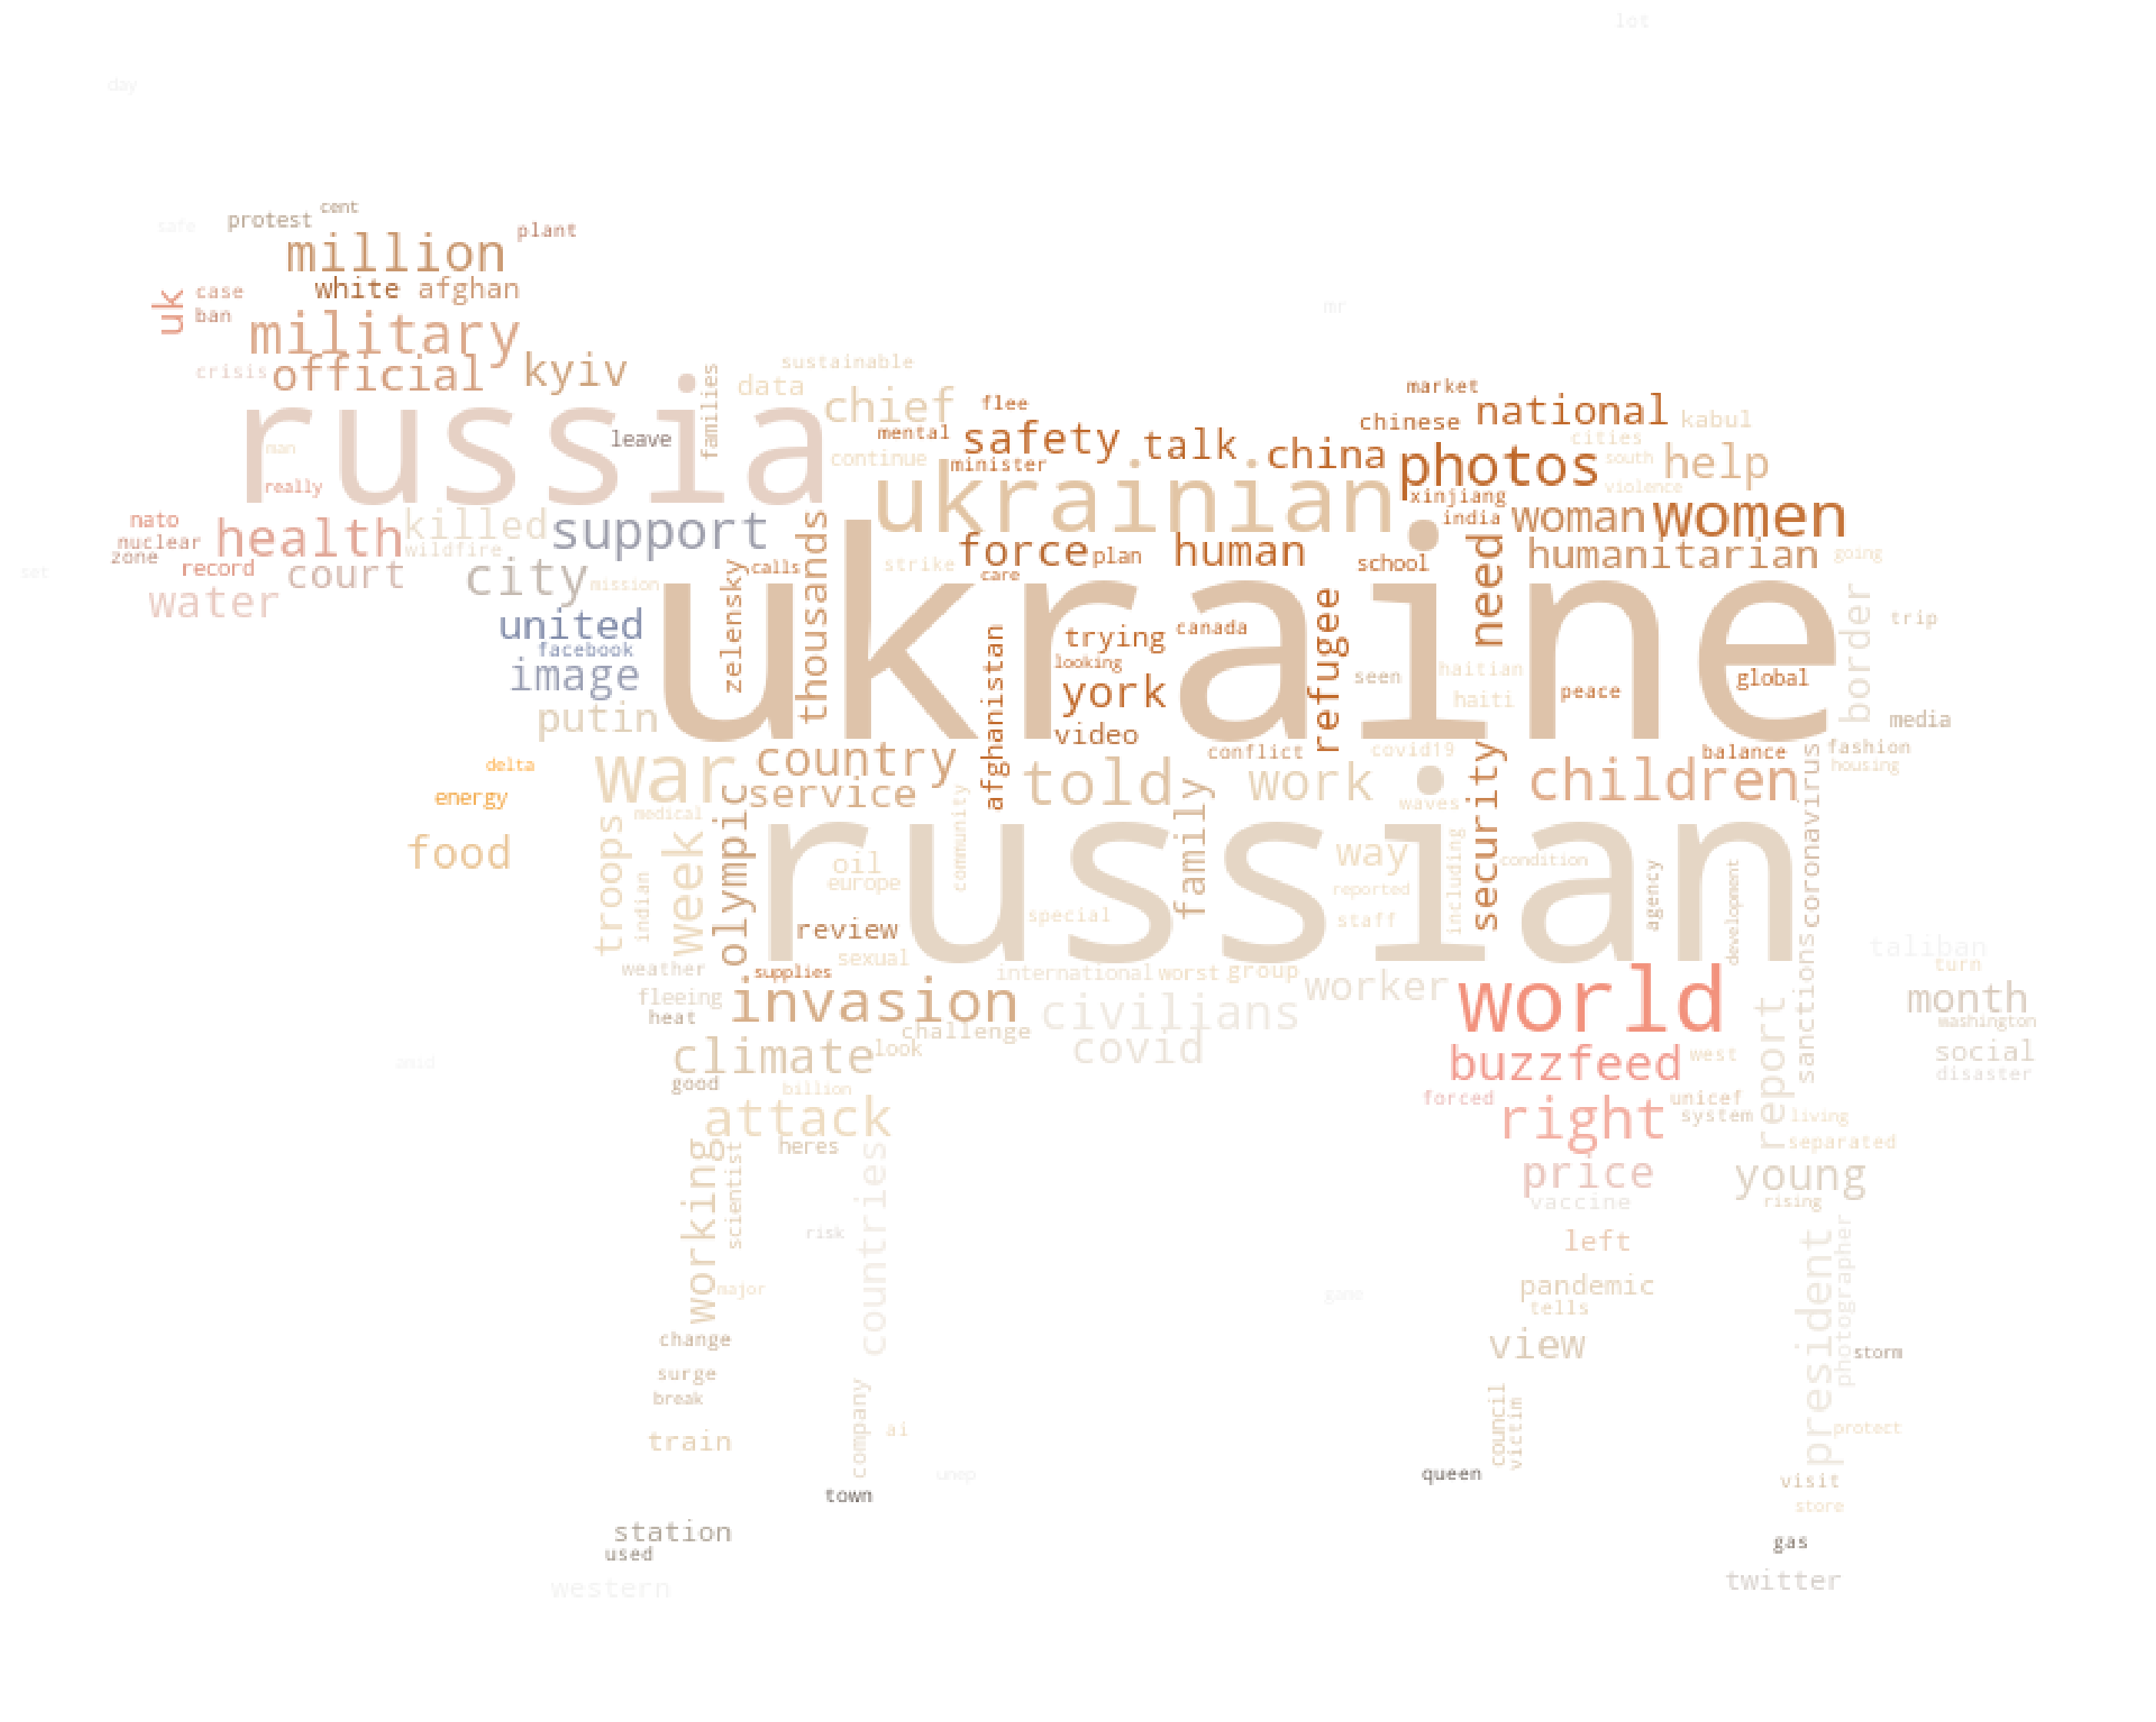

In [28]:
frame = np.array(Image.open('cow.png'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[50,50])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

<a href = "https://www.youtube.com/watch?v=aGgnM-Eu3Wg">Original Video</a>